# Otniel Abiezer - 1301180469

## Load Data

Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import rcParams
import warnings


Mengatur Style

In [ ]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])
warnings.filterwarnings("ignore")

Melakukan import data. Cukup lama karena datanya berat

In [ ]:
df_kendaraan_train = pd.read_excel('https://drive.google.com/uc?id=1KtKBdDVLG1nh9-i_7_F47Absasy_mJQ2')
df_kendaraan_test = pd.read_excel('https://drive.google.com/uc?id=1lanpFn-fkiBMMjX99otmqjswW8Eeagbx')

Isi data training

In [ ]:
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Isi data testing

In [ ]:
df_kendaraan_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## Data Exploration

### Train

Untuk menampilkan ukuran dataset

In [ ]:
df_kendaraan_train.shape

(285831, 12)

Mengetahui nilai null dan juga tipe data setiap kolom

In [ ]:
df_kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Mengetahui statistik setiap kolom

In [ ]:
df_kendaraan_train.describe(include='all')

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271391,271617.000000,271427.000000,271525.000000,271602.000000,271556,271643,271262.000000,271532.000000,271839.000000,285831.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,NaN,146678,NaN,NaN,NaN,NaN,142761,137123,NaN,NaN,NaN,NaN
mean,142916.000000,NaN,38.844336,0.997848,26.405410,0.458778,NaN,NaN,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,NaN,15.522487,0.046335,13.252714,0.498299,NaN,NaN,17155.000770,54.202457,83.694910,0.327830
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39377.750000,152.000000,227.000000,0.000000


Membagi kolom ke dalam 2 kategori berdasarkan tipe datanya

In [ ]:
kategorikal = ['Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak']
numerikal = ['id', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik']

#### Univariate Analysis

Menampilkan Box Plot agar mengetahui outlier

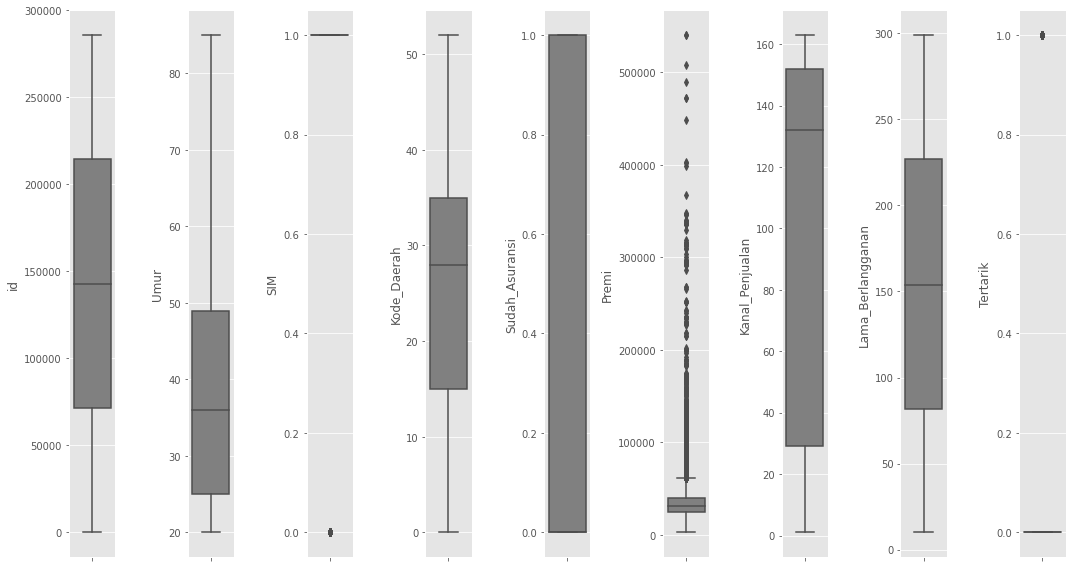

In [ ]:
for i in range(0, len(numerikal)):
    plt.subplot(1, len(numerikal), i+1)
    sns.boxplot(y=df_kendaraan_train[numerikal[i]], color='gray', orient='v')
    plt.tight_layout()

Menampilkan persebaran data

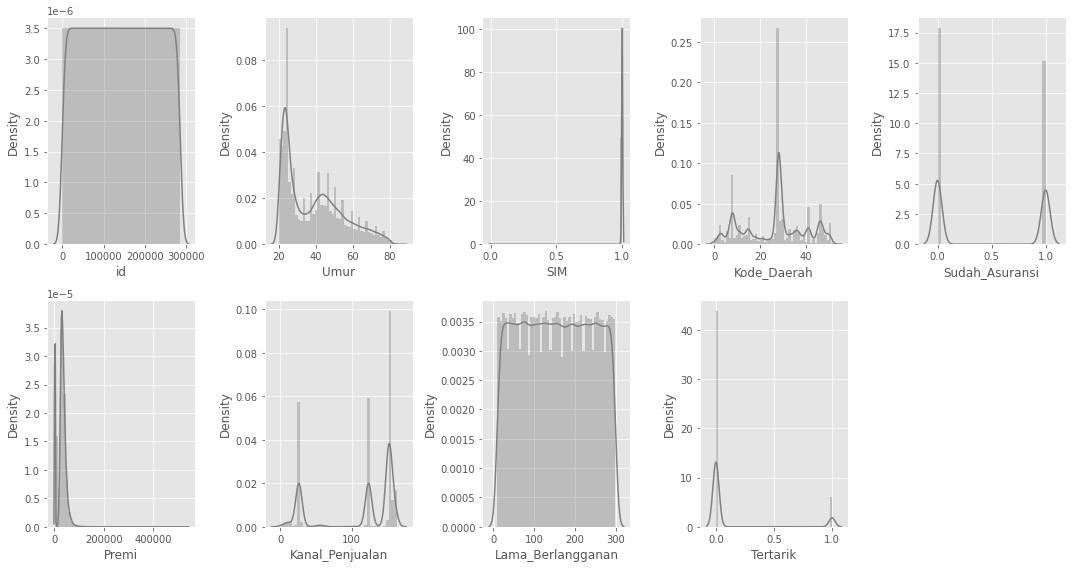

In [ ]:
for i in range(0, len(numerikal)):
    plt.subplot(2, 5, i+1)
    sns.distplot(df_kendaraan_train[numerikal[i]], color='gray')
    plt.tight_layout()

Untuk data kategorikal, menampilkan frekuensi

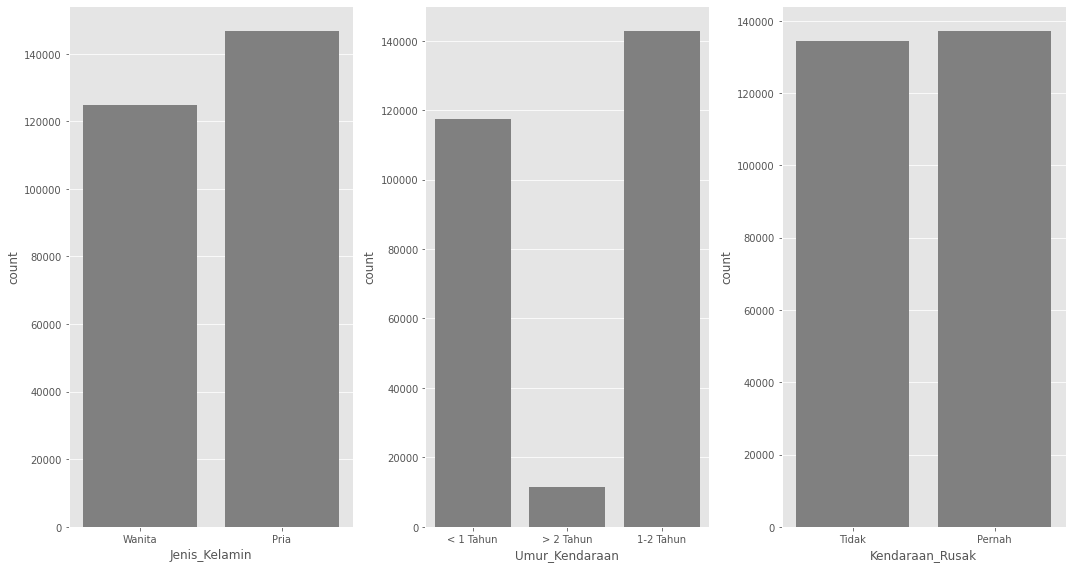

In [ ]:
for i in range(0, len(kategorikal)):
    plt.subplot(1, 3, i+1)
    sns.countplot(df_kendaraan_train[kategorikal[i]], color='gray', orient='v')
    plt.tight_layout()

#### Bivariate Analysis

Korelasi

In [ ]:
df_kendaraan_train.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


Visualisasi korelasi dengan heatmap

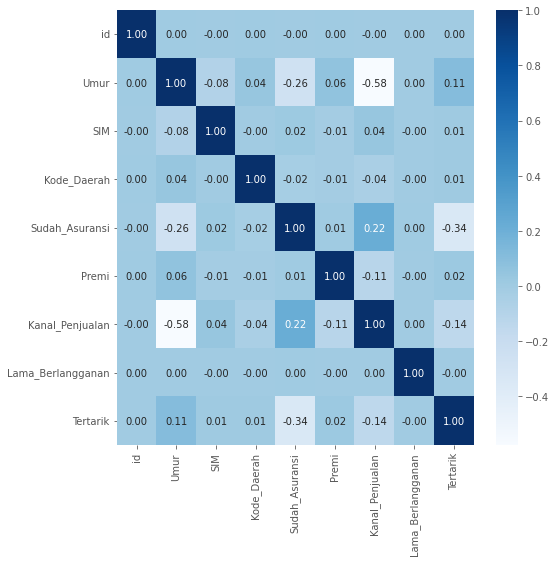

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_kendaraan_train.corr(), cmap='Blues', annot=True, fmt='.2f')

### Test

In [ ]:
df_kendaraan_test.shape

(47639, 11)

In [ ]:
df_kendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
df_kendaraan_test.describe(include='all')

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639,47639.000000,47639.000000,47639.000000,47639.000000,47639,47639,47639.000000,47639.000000,47639.000000,47639.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,25870,NaN,NaN,NaN,NaN,24966,24041,NaN,NaN,NaN,NaN
mean,NaN,38.815466,0.997922,26.331514,0.457608,NaN,NaN,30626.481202,112.180566,154.447574,0.123029
std,NaN,15.548817,0.045540,13.213353,0.498205,NaN,NaN,17404.792248,54.162703,83.642137,0.328474
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24395.500000,29.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31738.000000,135.000000,155.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39474.500000,152.000000,227.000000,0.000000


## Data Preprocessing

#### Missing Value

Mengetahui persen missing value di setiap kolom

In [ ]:
df_kendaraan_train.isnull().sum() / df_kendaraan_train.shape[0] * 100

id                   0.000000
Jenis_Kelamin        5.051936
Umur                 4.972869
SIM                  5.039341
Kode_Daerah          5.005055
Sudah_Asuransi       4.978116
Umur_Kendaraan       4.994210
Kendaraan_Rusak      4.963772
Premi                5.097068
Kanal_Penjualan      5.002606
Lama_Berlangganan    4.895200
Tertarik             0.000000
dtype: float64

Persen data yang dipakai setelah menghilangkan missing value

In [ ]:
data_awal = df_kendaraan_train.shape[0]
df_kendaraan_train.dropna(inplace=True)
df_kendaraan_train.shape[0] / data_awal * 100

59.849351539895956

### Scaling

Standarisasi kolom Premi karena persebarannya skew

In [ ]:
standar_premi = (df_kendaraan_train['Premi'] - df_kendaraan_train['Premi'].mean()) / (df_kendaraan_train['Premi'].std())
df_kendaraan_train['Premi'] = standar_premi
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,-0.144979,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,-0.275403,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,-1.631134,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,-0.454743,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,0.016340,160.0,31.0,0


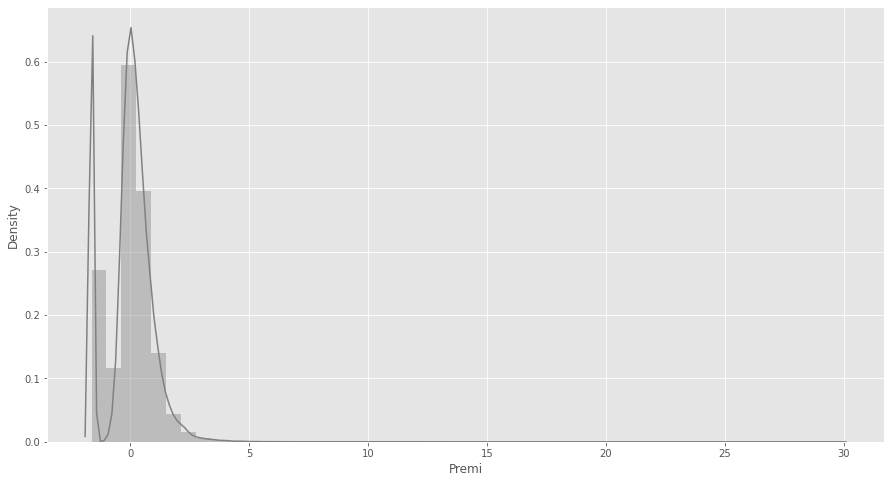

In [ ]:
sns.distplot(df_kendaraan_train['Premi'], color='gray')

Normalisasi kolom Umur

In [ ]:
norm_umur = (df_kendaraan_train['Umur'] - df_kendaraan_train['Umur'].min()) / (df_kendaraan_train['Umur'].max() - df_kendaraan_train['Umur'].min())
df_kendaraan_train['Umur'] = norm_umur
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,0.153846,1.0,33.0,1.0,< 1 Tahun,Tidak,-0.144979,152.0,97.0,0
1,2,Pria,0.430769,1.0,39.0,0.0,> 2 Tahun,Pernah,-0.275403,29.0,158.0,0
3,4,Wanita,0.584615,1.0,48.0,0.0,1-2 Tahun,Tidak,-1.631134,124.0,63.0,0
5,6,Pria,0.015385,1.0,35.0,1.0,< 1 Tahun,Tidak,-0.454743,152.0,171.0,0
8,9,Wanita,0.000000,1.0,8.0,1.0,< 1 Tahun,Tidak,0.016340,160.0,31.0,0


### Categorical Encoding

Mengubah kategori menjadi numerik

In [ ]:
cat_to_num = {"Jenis_Kelamin":     {"Wanita": 1.0, "Pria": 0.0},
              "Kendaraan_Rusak": {"Tidak": 0.0, "Pernah": 1.0},
              "Umur_Kendaraan" : {"< 1 Tahun": 0.0, "1-2 Tahun": 0.5, "> 2 Tahun": 1}}

df_kendaraan_train = df_kendaraan_train.replace(cat_to_num)
df_kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 171068 non-null  int64  
 1   Jenis_Kelamin      171068 non-null  float64
 2   Umur               171068 non-null  float64
 3   SIM                171068 non-null  float64
 4   Kode_Daerah        171068 non-null  float64
 5   Sudah_Asuransi     171068 non-null  float64
 6   Umur_Kendaraan     171068 non-null  float64
 7   Kendaraan_Rusak    171068 non-null  float64
 8   Premi              171068 non-null  float64
 9   Kanal_Penjualan    171068 non-null  float64
 10  Lama_Berlangganan  171068 non-null  float64
 11  Tertarik           171068 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 17.0 MB


### Feature Selection

Menampilkan heatmap korelasi lagi setelah mengubah kategorikal menjadi numerikal untuk melakukan feature selection

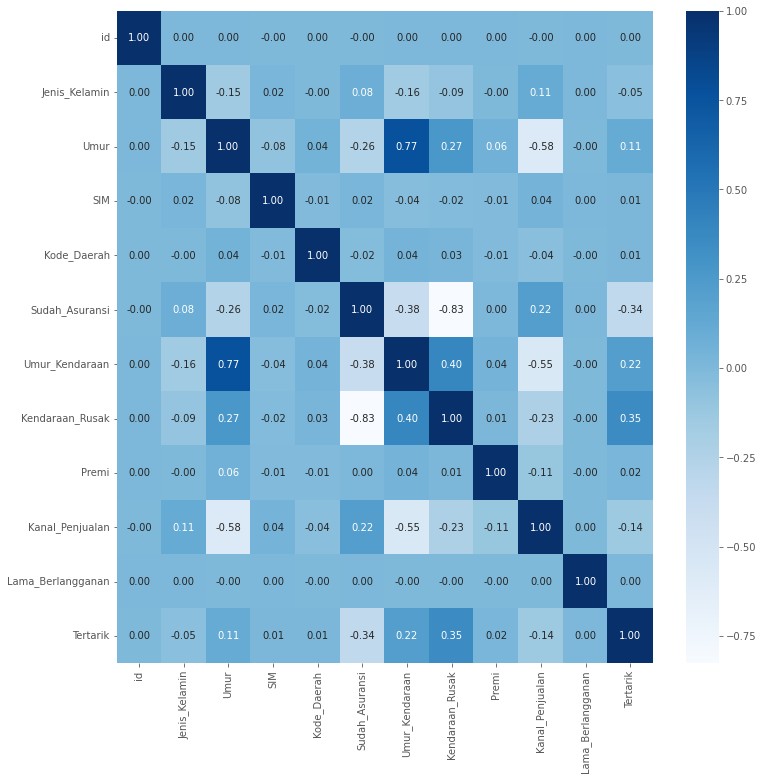

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_kendaraan_train.corr(), cmap='Blues', annot=True, fmt='.2f')

Pemilihan

In [ ]:
df_kendaraan_train = df_kendaraan_train[['id', 'Jenis_Kelamin', 'Umur', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak']]
df_kendaraan_train = df_kendaraan_train.reset_index()
df_kendaraan_train = df_kendaraan_train.drop(columns=['index'])
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak
0,1,1.0,0.153846,1.0,0.0,0.0
1,2,0.0,0.430769,0.0,1.0,1.0
2,4,1.0,0.584615,0.0,0.5,0.0
3,6,0.0,0.015385,1.0,0.0,0.0
4,9,1.0,0.000000,1.0,0.0,0.0


In [ ]:
df_kendaraan_train.describe()

,id,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak
count,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000
mean,142794.020729,0.459338,0.289510,0.459794,0.303999,0.504443
std,82491.716355,0.498345,0.238949,0.498382,0.283813,0.499982
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71350.750000,0.000000,0.076923,0.000000,0.000000,0.000000
50%,142768.000000,0.000000,0.246154,0.000000,0.500000,1.000000
75%,214070.250000,1.000000,0.446154,1.000000,0.500000,1.000000
max,285831.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_kendaraan_train.to_excel(r'hasil_preprocessing.xlsx', index=False, header=True)

## Modeling

In [ ]:
model = df_kendaraan_train.values.tolist()
len(model)

171068

Mengubah nilai K, bisa diganti sesuai kebutuhan

In [ ]:
K = 11

Definisi Function

In [ ]:
#Mencari jarak antar titik menggunakan Euclidean Distance
def EuclideanDistance(titik1, titik2):
    jumlah = 0
    for i in range (0,5):
        hasil = (titik1[i+1] - titik2[i+1]) ** 2
        jumlah += hasil
    return np.sqrt(jumlah)

#Melakukan Perubahan Centroid setelah dihitung rata2 semua titik yang masuk cluster tersebut
def geserCentroid(cluster):
  new_centroid = [0.0]
  for i in range(0,5):
    jumlah = 0
    for j in range(0, len(cluster)-1):
      jumlah += cluster[j+1][i+1]
    new_titik = jumlah / (len(cluster))
    new_centroid.append(new_titik)
  return new_centroid

#Mencari apakah suatu nilai ada pada suatu array / list
def is_found(anggota, arr):
  for i in range(0,len(arr)):
    if (arr[i] == anggota):
      return True
  return False

Random Centroid

In [ ]:
#Inisiasi Centroid dengan angka random berdasarkan banyak data
calon_sentroid = []    
acak = np.random.randint(0,len(model)-1)
calon_sentroid.append(acak)

#Melakukan inisiasi angka random sebanyak K dan menjamin tidak ada angka yang sama
for i in range(0,K-1):
  while True:
    acak = np.random.randint(0,len(model)-1)
    if not is_found(acak, calon_sentroid):
      calon_sentroid.append(acak)
      break

list_centroid = []     #Berisi koordinat centroid-centroid
list_cluster = []      #Berisi cluster (sebanyak K) dan menampung titik-titik pada cluster tersebut


for i in range(0,3*K):
  if (0 <= i <= K-1):
    list_centroid.append(model[calon_sentroid[i]])                    #Mengisi titik Centroid berdasarkan angka random (yang menunjukan indeks) di atas
  elif (K <= i <= 2*K-1):
    list_cluster.append(["Cluster" + str(i-K)])                       #Menambahkan nama "Cluster ke-n" di awal list_cluster
  else:
    list_cluster[i-2*K].append(list_centroid[i-2*K])                  #Memasukkan centroid sebagai anggota pertama masing-masing cluster

list_cluster

[['Cluster0', [140604.0, 1.0, 0.06153846153846154, 1.0, 0.0, 0.0]],
 ['Cluster1', [32774.0, 0.0, 0.046153846153846156, 1.0, 0.0, 0.0]],
 ['Cluster2', [87627.0, 0.0, 0.13846153846153847, 0.0, 0.5, 1.0]],
 ['Cluster3', [62161.0, 0.0, 0.4, 0.0, 0.5, 1.0]],
 ['Cluster4', [98946.0, 1.0, 0.07692307692307693, 1.0, 0.0, 0.0]],
 ['Cluster5', [107673.0, 1.0, 0.07692307692307693, 0.0, 0.0, 0.0]],
 ['Cluster6', [232377.0, 0.0, 0.06153846153846154, 1.0, 0.0, 0.0]],
 ['Cluster7', [156124.0, 1.0, 0.07692307692307693, 0.0, 0.0, 1.0]],
 ['Cluster8', [153641.0, 0.0, 0.0, 1.0, 0.0, 0.0]],
 ['Cluster9', [165730.0, 1.0, 0.1076923076923077, 0.0, 0.0, 1.0]],
 ['Cluster10', [46789.0, 0.0, 0.46153846153846156, 0.0, 0.5, 1.0]]]

Melakukan Clustering

In [ ]:
list_jarak = []

while True:                              #Melakukan loop sampai semua Centroid tidak bergeser lagi
  for i in range(0,len(model)):          #Melakukan loop untuk menghitung titik setiap data                                                         
    for j in range(0,K):                 #Melakukan loop untuk menghitung di titik i jarak terhadap centroid yang lain
      list_jarak.append(EuclideanDistance(list_centroid[j], model[i]))
    #endfor

    jarak_terdekat = min(list_jarak)              #Memilih jarak terpendek

    for j in range(0,K):                          #Mencari jarak terdekat dari nilai di atas ada pada cluster mana, lalu memasukannya ke dalam list_cluster
      if (list_jarak[j] == jarak_terdekat):
        list_cluster[j].append(model[i])
    #endfor
    

    list_jarak.clear()                           #Melakukan clear pada list_jarak yang akan dipakai lagi pada loop berikutnya

  list_new_centroid = []                         #Tempat calon Centroid baru
  for i in range(0,K):
    list_new_centroid.append(geserCentroid(list_cluster[i]))    #Melakukan pergeseran Centroid

  if (list_new_centroid == list_centroid):                      #Kondisi loop  utama (while True) berhenti kalau tidak ada pergerakan Centroid
    break
  else:
    list_centroid = list_new_centroid                           #Kalau masih berubah, centroid diubah
  
  for i in range(0,K):                                          #Output agar tahu di setiap perulangan banyak anggota masing-masing cluster
    print("Cluster",i, " sebanyak ", len(list_cluster[i]) - 1)
  print()

  for i in range(0,K):                                          #Melakukan clear list_cluster kecuali anggota pertama (yang berisi ket. Cluster1, Cluster2, dst)
    list_cluster[i] = list_cluster[i][:1]

for i in range(0, K):                                           #Output final
  print("\nCentroid",i," ada di titik ", list_centroid[i])
  print("Cluster",i," ada sebanyak ", len(list_cluster[i])-1)


Cluster 0  sebanyak  15009
Cluster 1  sebanyak  6207
Cluster 2  sebanyak  15595
Cluster 3  sebanyak  16841
Cluster 4  sebanyak  23748
Cluster 5  sebanyak  5979
Cluster 6  sebanyak  29568
Cluster 7  sebanyak  8633
Cluster 8  sebanyak  2560
Cluster 9  sebanyak  26161
Cluster 10  sebanyak  23094

Cluster 0  sebanyak  27925
Cluster 1  sebanyak  20587
Cluster 2  sebanyak  9930
Cluster 3  sebanyak  24506
Cluster 4  sebanyak  10897
Cluster 5  sebanyak  9104
Cluster 6  sebanyak  15744
Cluster 7  sebanyak  10406
Cluster 8  sebanyak  1124
Cluster 9  sebanyak  24350
Cluster 10  sebanyak  16495

Cluster 0  sebanyak  27934
Cluster 1  sebanyak  20603
Cluster 2  sebanyak  9453
Cluster 3  sebanyak  24538
Cluster 4  sebanyak  10888
Cluster 5  sebanyak  10579
Cluster 6  sebanyak  15728
Cluster 7  sebanyak  10414
Cluster 8  sebanyak  2434
Cluster 9  sebanyak  24342
Cluster 10  sebanyak  14155

Cluster 0  sebanyak  27933
Cluster 1  sebanyak  20603
Cluster 2  sebanyak  9453
Cluster 3  sebanyak  25135
Clust

## Evaluation

Menggunakan Silhoutte Coeficient

In [ ]:
def a_i(cluster1, titik_i):
  jumlah = 0
  for i in range(1,len(cluster1)):
    if (titik_i[0] != cluster1[i][0]):
      jumlah += EuclideanDistance(cluster1[i], titik_i)
  return (jumlah/(len(cluster1)-1))

def b_i(cluster_sisa, titik_i):
  jarak_antar_cluster = []
  for i in range(1,K):
    jumlah=0
    for j in range(1,len(cluster_sisa[i])-1):
      jumlah += EuclideanDistance(cluster_sisa[i][j], titik_i)
    jarak_antar_cluster.append(jumlah/len(cluster_sisa[i]))

  return min(jarak_antar_cluster)

def s_i(list_cluster):
  i = np.random.randint(1,len(list_cluster[0])-1)
  nilai_b_i = b_i(list_cluster, list_cluster[0][i])
  nilai_a_i = a_i(list_cluster[0], list_cluster[0][i])
  return (nilai_b_i - nilai_a_i) / (max(nilai_b_i, nilai_a_i))

Melakukan perhitungan untuk titik pada suatu cluster ke cluster lainnya

In [ ]:
total = 0

for i in range(0,200):
  silhoutte_score = s_i(list_cluster)
  total += silhoutte_score
  print("Perulangan ke-", i, " dengan Silhoutte Score ", total/(i+1))

print("\nAverage Silhoutte Score = ", total/200)

Perulangan ke- 0  dengan Silhoutte Score  0.8943010112811615
Perulangan ke- 1  dengan Silhoutte Score  0.8887019933385449
Perulangan ke- 2  dengan Silhoutte Score  0.8882653452342572
Perulangan ke- 3  dengan Silhoutte Score  0.8846584817845495
Perulangan ke- 4  dengan Silhoutte Score  0.8865869876838719
Perulangan ke- 5  dengan Silhoutte Score  0.8867211645741735
Perulangan ke- 6  dengan Silhoutte Score  0.8884659378891252
Perulangan ke- 7  dengan Silhoutte Score  0.8894510852130365
Perulangan ke- 8  dengan Silhoutte Score  0.890217310909412
Perulangan ke- 9  dengan Silhoutte Score  0.8910890375963543
Perulangan ke- 10  dengan Silhoutte Score  0.8913810352040641
Perulangan ke- 11  dengan Silhoutte Score  0.892010497085295
Perulangan ke- 12  dengan Silhoutte Score  0.892186690484977
Perulangan ke- 13  dengan Silhoutte Score  0.8924838637703656
Perulangan ke- 14  dengan Silhoutte Score  0.8900864463710838
Perulangan ke- 15  dengan Silhoutte Score  0.8899180465369961
Perulangan ke- 16  de

## Experiment

Penggantian nilai K

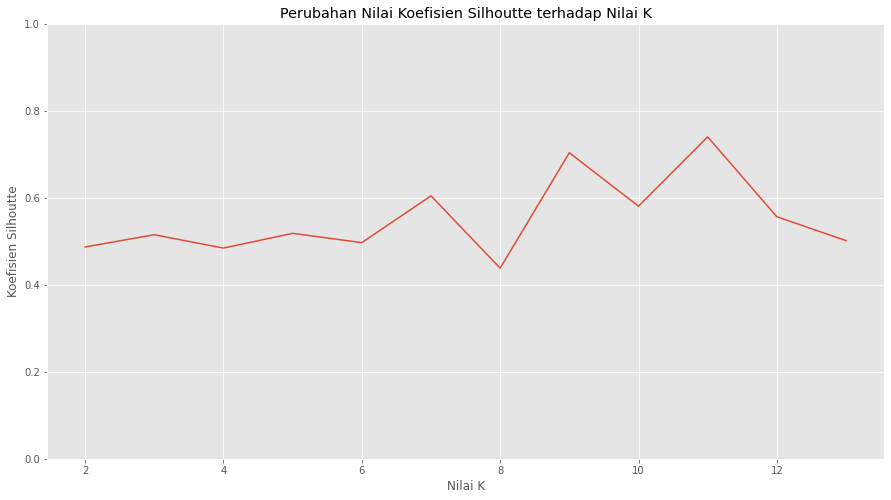

In [ ]:
nilai_k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
silhoutte_koef = [0.48712, 0.51524, 0.48454, 0.51847,
                  0.49709, 0.60464, 0.43837, 0.70373,
                  0.58090, 0.74021, 0.55663, 0.50173]

f, ax = plt.subplots(1)
xdata = nilai_k
ydata = silhoutte_koef
ax.plot(xdata, ydata)
ax.set_ylim(bottom=0, top=1)
plt.title("Perubahan Nilai Koefisien Silhoutte terhadap Nilai K")
plt.xlabel("Nilai K")
plt.ylabel("Koefisien Silhoutte")
plt.show(f)